In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.patches

import numpy as np
import scipy as sp
import scipy.integrate
from scipy.interpolate import make_interp_spline, BSpline
np.set_printoptions(linewidth=120)
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

from spectral import *
from elasticity import *

In [2]:
module_path

'/home/feodor/Documents/Spectral v1.04.1'

In [3]:
%run -i 'simulation_samples/FullEqn_table_top_mat1_A-0.04/data.py'

In [4]:
direct = 'simulation_samples/FullEqn_table_top_mat1_A-0.04/'

mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T = np.load(direct + 'time.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U = TensorField(mesh, U_func)
A0 = -0.04

In [5]:
def animate(k, u, c, T):
    line.set_data(x, u[k, :](x + c*T[k]))
    time_template = 'time = %.1f'
    time_text.set_text(time_template % T[k])
    return line, time_text

def init(U, T, x):
    u = U[:, 0](None, 0, 0).diff()
    A0 = np.max(np.abs(u[0](x)))
    A0 *= np.sign(np.max(u[0](x)) - A0*(1.0 - 1e-10))
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-0.8, 1.8)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$U_x(x, 0, 0)$')
    plt.close()
    return u/A0

In [185]:
fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot([], [])
time_text = ax.text(0.75, 0.9, '', transform=ax.transAxes)

u = init(U, T, x)
animation.FuncAnimation(fig, animate, frames=len(T), 
                        interval=100, blit=True, fargs=(u, rod.c, T))

# Soliton profiles (GE-)

## Small amplitude

In [38]:
direct = 'simulation_samples/FullEqn_table_top_mat1_A-0.01/'

In [39]:
%run -i 'simulation_samples/FullEqn_table_top_mat1_A-0.01/data.py'

<Figure size 432x288 with 0 Axes>

In [40]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T1 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U1 = TensorField(mesh, U_func)
A0 = -0.01
l = 50

In [41]:
y = U1[-1, 0].diff(0)(x, 0, 0)
A1 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)

y = U1[0, 0].diff(0)(x, 0, 0)
A10 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
eps = np.abs(A10)
eps

0.0052482420096653755

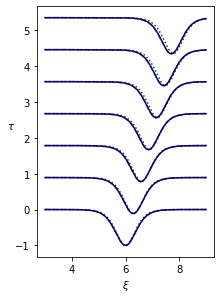

In [45]:
x = np.linspace(150, 450, 301)
fig = plt.figure(figsize=(3,4))
plt.subplots_adjust(left=0.14, right=0.96, top=.99, bottom=0.12)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\tau$', rotation=0)
sc = 1
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, int(len(T1)/1.7), int(len(T1)/10-1)):
    u = U1[i, 0].diff(0)(x + rod.c*T1[i], 0, 0)/np.abs(A10)
    u0 = U1[0, 0].diff(0)(x - v*T1[i], 0, 0)/np.abs(A10)
    u_kdv = rod.sol_kdv_strain(A10, x - rod.L/2, T1[i])/np.abs(A10)
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 20, -sc), 10, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(640, -1.1*sc, str(A10)[:6])
#ax.text(640, -0.25*sc, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol_evol1.pdf')

## Medium amplitude

In [17]:
direct = 'simulation_samples/FullEqn_table_top_mat1_A-0.04/'

In [18]:
%run -i 'simulation_samples/FullEqn_table_top_mat1_A-0.04/data.py'

In [19]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T2 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U2 = TensorField(mesh, U_func)
A0 = -0.04
l = 30

In [20]:
y = U2[-1, 0].diff(0)(x, 0, 0)
A2 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)

y = U2[0, 0].diff(0)(x, 0, 0)
A20 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
eps = np.abs(A20)
eps

0.02725024549297458

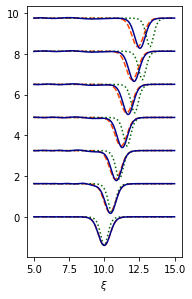

In [37]:
x = np.linspace(150, 450, 301)
fig = plt.figure(figsize=(2.5,4))
plt.subplots_adjust(left=0.11, right=0.97, top=.99, bottom=0.12)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
#ax.set_ylabel('t, ms')
sc = 1.4
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, len(T2), int(len(T2)/5-2)):
    u = U2[i, 0].diff(0)(x + rod.c*T2[i], 0, 0)/np.abs(A20)
    u0 = U2[0, 0].diff(0)(x - v*T2[i], 0, 0)/np.abs(A20)
    u_kdv = rod.sol_kdv_strain(A20, x - rod.L/2, T2[i])/np.abs(A20)
    ax.plot(x/l, np.ones_like(x)*T2[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T2[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T2[i]*t_sc + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 10, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(472, -1.2*sc, str(A20)[:6])
#ax.text(472, -0.2*sc, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol_evol2.pdf')

## Set of figures for animation

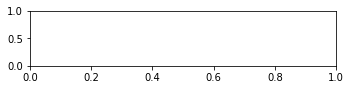

In [13]:
fig = plt.figure(figsize=(5,1.5))
plt.subplots_adjust(left=0.14, right=0.99, top=.8, bottom=0.29)
ax = plt.axes()

for i in range(0, len(T2), 1):
    u = U2[i, 0].diff(0)(x + rod.c*T2[i], 0, 0)
    u0 = U2[0, 0].diff(0)(x - v*T2[i], 0, 0)
    u_kdv = rod.sol_kdv_strain(A20, x - rod.L/2, T2[i])
    ax.plot(x, u0, '--', color='orangered')
    ax.plot(x, u_kdv, ':', color='darkgreen')
    ax.plot(x, u, color='darkblue')
    ax.set_xlabel(r'$\xi$, mm')
    ax.set_ylabel('u', rotation=0)
    ax.set_ylim([-1.4*np.abs(A20), 0.2*np.abs(A20)])
    ax.text(0.1, 0.15, 'time = %.2f ms' % (T2[i]/1000), transform=ax.transAxes)    
    ax.legend(['eKdV', 'KdV', 'Full equations'], ncol=3, bbox_to_anchor=(0.07, 0.97))
    fig.savefig(module_path + '/figures/medium_ampl_anim/p' + str(i) + '.pdf')
    plt.cla()

## Large amplitude (close to critical)

In [46]:
direct = 'simulation_samples/FullEqn_table_top_mat1_A-0.0499/'

In [47]:
%run -i 'simulation_samples/FullEqn_table_top_mat1_A-0.0499/data.py'

<Figure size 432x288 with 0 Axes>

In [48]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T3 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U3 = TensorField(mesh, U_func)
A0 = -0.0499
l = 30

In [49]:
y = U3[-1, 0].diff(0)(x, 0, 0)
A3 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
A3

y = U3[0, 0].diff(0)(x, 0, 0)
A30 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
eps = np.abs(A30)
eps

0.047846029515759246

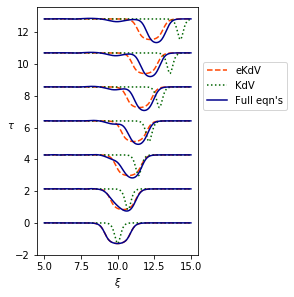

In [73]:
x = np.linspace(150, 450, 601)
fig = plt.figure(figsize=(4,4))
plt.subplots_adjust(left=0.12, right=0.68, top=.99, bottom=0.13)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\tau$', rotation=0)
sc = 1.3
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, int(len(T3)/1.3), int(len(T3)/6-2)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)/np.abs(A30)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)/np.abs(A30)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])/np.abs(A30)
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u*sc, color='darkblue')
ax.legend(['eKdV', 'KdV', 'Full eqn\'s'], bbox_to_anchor=(1.0, 0.8))
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 10, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(472, -1.3, str(A30)[:6])
#ax.text(472, -0.2, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol_evol3_legend.pdf')

## Set of figures for animation

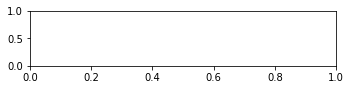

In [17]:
fig = plt.figure(figsize=(5,1.5))
plt.subplots_adjust(left=0.14, right=0.99, top=.8, bottom=0.29)
ax = plt.axes()

for i in range(0, len(T3), 1):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])
    ax.plot(x, u0, '--', color='orangered')
    ax.plot(x, u_kdv, ':', color='darkgreen')
    ax.plot(x, u, color='darkblue')
    ax.set_xlabel(r'$\xi$, mm')
    ax.set_ylabel('u', rotation=0)
    ax.set_ylim([-1.4*np.abs(A30), 0.2*np.abs(A30)])
    ax.text(0.1, 0.15, 'time = %.2f ms' % (T3[i]/1000), transform=ax.transAxes)    
    ax.legend(['eKdV', 'KdV', 'Full equations'], ncol=3, bbox_to_anchor=(0.07, 0.97))
    fig.savefig(module_path + '/figures/table_top_anim/p' + str(i) + '.pdf')
    plt.cla()

## All together

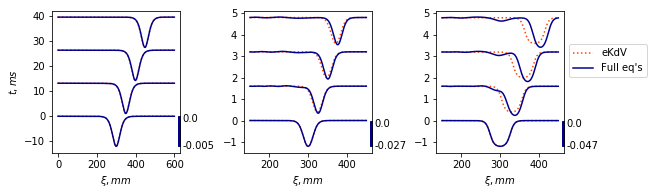

In [596]:
fig, ax = plt.subplots(1, 3, figsize=(9,2.5))
ax[0].set_ylabel('$t, ms$')
x = np.linspace(150, 450, 201)

# 3
sc = 1.2
v = rod.sol_gardner_params(-0.0499)[2]
for i in range(0, len(U3), int(len(U3)/3-1)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)/np.abs(A30)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)/np.abs(A30)
    ax[2].plot(x, np.ones_like(x)*T3[i]/1000 + u0*sc, ':', color='orangered')
    ax[2].plot(x, np.ones_like(x)*T3[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 10, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
ax[2].legend(['eKdV', 'Full eq\'s'], bbox_to_anchor=(1.0, 0.8))
ax[2].add_patch(rect)
ax[2].set_xlabel(r'$\xi, mm$')
ax[2].text(472, -1.3, str(A30)[:6])
ax[2].text(472, -0.3, '0.0')

# 2
sc = 1.2
v = rod.sol_gardner_params(-0.04)[2]
for i in range(0, len(U2), int(len(U2)/3-1)):
    u = U2[i, 0].diff(0)(x + rod.c*T2[i], 0, 0)/np.abs(A20)
    u0 = U2[0, 0].diff(0)(x - v*T2[i], 0, 0)/np.abs(A20)
    ax[1].plot(x, np.ones_like(x)*T2[i]/1000 + u0*sc, ':', color='orangered')
    ax[1].plot(x, np.ones_like(x)*T2[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 10, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
ax[1].add_patch(rect)
ax[1].set_xlabel(r'$\xi, mm$')
ax[1].text(472, -1.3, str(A20)[:6])
ax[1].text(472, -0.3, '0.0')

# 1
x = np.linspace(0, rod.L, 301)
sc = 12
v = rod.sol_gardner_params(-0.01)[2]
for i in range(0, int(len(T1)), int(len(T1)/3-1)):
    u = U1[i, 0].diff(0)(x + rod.c*T1[i], 0, 0)/np.abs(A10)
    u0 = U1[0, 0].diff(0)(x - v*T1[i], 0, 0)/np.abs(A10)
    ax[0].plot(x, np.ones_like(x)*T1[i]/1000 + u0*sc, ':', color='orangered')
    ax[0].plot(x, np.ones_like(x)*T1[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 20, -sc), 10, sc, 
                                    color='darkblue',clip_on=False)
ax[0].add_patch(rect)
ax[0].set_xlabel(r'$\xi, mm$')
ax[0].text(640, -1.1*sc, str(A10)[:6])
ax[0].text(640, -0.2*sc, '0.0')

plt.subplots_adjust(left=0.07, right=0.86, top=0.99, bottom=0.2, wspace=0.5)

fig.savefig('figures/' + 'sol_evol_all.pdf')

## Extremely close to critical amplitude

In [74]:
direct = 'simulation_samples/FullEqn_table_top_mat1_A-0.0499825675/'

In [75]:
%run -i 'simulation_samples/FullEqn_table_top_mat1_A-0.0499825675/data.py'

<Figure size 432x288 with 0 Axes>

In [92]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T3 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U3 = TensorField(mesh, U_func)
A0 = -0.0499825675
l = 100

In [93]:
y = U3[-1, 0].diff(0)(x, 0, 0)
A3 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)

A30 = U3[0, 0].diff(0)(rod.L/2, 0, 0)
eps = np.abs(A30)
eps

0.04998189130314919

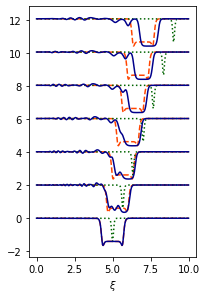

In [99]:
x = np.linspace(0, 1000, 501)
fig = plt.figure(figsize=(2.7,4))
plt.subplots_adjust(left=0.11, right=0.97, top=.99, bottom=0.12)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
#ax.set_ylabel('t, ms')
sc = 1.4
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, int(len(T3)/2), int(len(T3)/11-4)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)/np.abs(A30)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)/np.abs(A30)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])/np.abs(A30)
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full eq\'s'], bbox_to_anchor=(1.0, 0.8))
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 35, -sc), 10, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(1080, -1.2*sc, str(A30)[:6])
#ax.text(1080, -0.2*sc, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol_evol4.pdf')

## Set of figures for animation

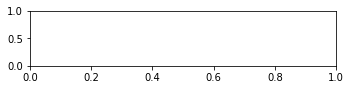

In [11]:
fig = plt.figure(figsize=(5,1.5))
plt.subplots_adjust(left=0.14, right=0.99, top=.8, bottom=0.29)
ax = plt.axes()

for i in range(0, int(len(T3)/1.7)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])
    ax.plot(x, u0, '--', color='orangered')
    ax.plot(x, u_kdv, ':', color='darkgreen')
    ax.plot(x, u, color='darkblue')
    ax.set_xlabel(r'$\xi$, mm')
    ax.set_ylabel('u', rotation=0)
    ax.set_ylim([-1.4*np.abs(A30), 0.2*np.abs(A30)])
    ax.text(0.1, 0.15, 'time = %.2f ms' % (T3[i]/1000), transform=ax.transAxes)    
    ax.legend(['eKdV', 'KdV', 'Full equations'], ncol=3, bbox_to_anchor=(0.07, 0.97))
    fig.savefig(module_path + '/figures/table_top2_anim/p' + str(i) + '.pdf')
    plt.cla()

# Soliton profiles (GE+)

## Small amplitude

In [127]:
direct = 'simulation_samples/FullEqn_table_top_mat2_A-0.05/'

In [128]:
%run -i 'simulation_samples/FullEqn_table_top_mat2_A-0.05/data.py'

<Figure size 432x288 with 0 Axes>

In [129]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T1 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U1 = TensorField(mesh, U_func)
A0 = -0.05
l = 30

In [130]:
y = U1[-1, 0].diff(0)(x, 0, 0)
A1 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)

y = U1[0, 0].diff(0)(x, 0, 0)
A10 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
eps = np.abs(A10)
eps

0.020015257815222683

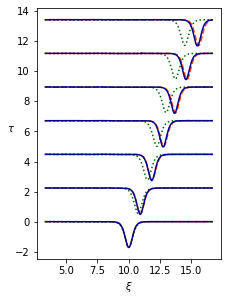

In [131]:
x = np.linspace(100, 500, 501)
fig = plt.figure(figsize=(3,4))
plt.subplots_adjust(left=0.12, right=0.97, top=.99, bottom=0.12)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\tau$', rotation=0)
sc = 1.7
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, int(len(T1)), int(len(T1)/6-1)):
    u = U1[i, 0].diff(0)(x + rod.c*T1[i], 0, 0)/np.abs(A10)
    u0 = U1[0, 0].diff(0)(x - v*T1[i], 0, 0)/np.abs(A10)
    u_kdv = rod.sol_kdv_strain(A10, x - rod.L/2, T1[i])/np.abs(A10)
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T1[i]*t_sc + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 20, -sc), 10, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(640, -1.1*sc, str(A10)[:6])
#ax.text(640, -0.25*sc, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol2_evol1.pdf')

## Medium amplitude

In [748]:
direct = 'simulation_samples/FullEqn_table_top_mat2_A-0.1/'

In [749]:
%run -i 'simulation_samples/FullEqn_table_top_mat2_A-0.1/data.py'

In [750]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T2 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U2 = TensorField(mesh, U_func)
A0 = -0.1

In [751]:
y = U2[-1, 0].diff(0)(x, 0, 0)
A2 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
A2
y = U2[0, 0].diff(0)(x, 0, 0)
A20 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
A20

-0.034175271652255305

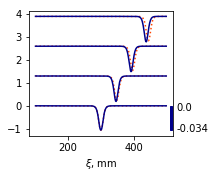

In [752]:
x = np.linspace(100, 500, 301)
fig = plt.figure(figsize=(2.7,2.2))
plt.subplots_adjust(left=0.08, right=0.82, top=.99, bottom=0.2)
ax = plt.axes()
ax.set_xlabel(r'$\xi$, mm')
#ax.set_ylabel('t, ms')
sc = 1.05
v = rod.sol_gardner_params(A0)[2]
for i in range(0, len(T2), int(len(T2)/3-1)):
    u = U2[i, 0].diff(0)(x + rod.c*T2[i], 0, 0)/np.abs(A20)
    u0 = U2[0, 0].diff(0)(x - v*T2[i], 0, 0)/np.abs(A20)
    ax.plot(x, np.ones_like(x)*T2[i]/1000 + u0*sc, ':', color='orangered')
    ax.plot(x, np.ones_like(x)*T2[i]/1000 + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 12, -sc), 6, sc, 
                                    color='darkblue',clip_on=False)
ax.add_patch(rect)
ax.text(530, -1.15, str(A20)[:6])
ax.text(530, -0.22, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol2_evol2.pdf')

## Large amplitude (close to critical)

In [132]:
direct = 'simulation_samples/FullEqn_table_top_mat2_A-0.2/'

In [133]:
%run -i 'simulation_samples/FullEqn_table_top_mat2_A-0.2/data.py'

<Figure size 432x288 with 0 Axes>

In [134]:
mesh_grid = np.load(direct + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
T3 = np.load(direct + 'time.npy')
#E = np.load(direct + 'energy.npy')
U_func = np.load(direct + 'displacement.npy')

x = np.linspace(0, L, 300)
U3 = TensorField(mesh, U_func)
A0 = -0.2
l = 20

In [135]:
y = U3[-1, 0].diff(0)(x, 0, 0)
A3 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)

y = U3[0, 0].diff(0)(x, 0, 0)
A30 = np.max(np.abs(y))*(2*np.int(np.abs(np.max(y)) > np.abs(np.min(y))) - 1)
eps = np.abs(A30)
eps

0.05425067639456039

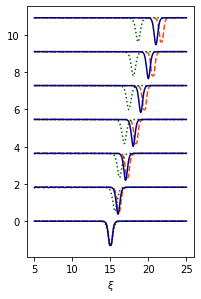

In [142]:
x = np.linspace(100, 500, 301)
fig = plt.figure(figsize=(2.7,4))
plt.subplots_adjust(left=0.11, right=0.97, top=.99, bottom=0.12)
ax = plt.axes()
ax.set_xlabel(r'$\xi$')
#ax.set_ylabel('t, ms')
sc = 1.3
v = rod.sol_gardner_params(A0)[2]
t_sc = eps*rod.c/l
for i in range(0, len(T3), int(len(T3)/6)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)/np.abs(A30)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)/np.abs(A30)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])/np.abs(A30)
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u0*sc, '--', color='orangered')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u_kdv*sc, ':', color='darkgreen')
    ax.plot(x/l, np.ones_like(x)*T3[i]*t_sc + u*sc, color='darkblue')
#ax.legend(['eKdV', 'Full eq\'s'], bbox_to_anchor=(1.0, 0.8))
#ax.legend(['eKdV', 'Full equations'], loc=2)
rect = matplotlib.patches.Rectangle((x[-1] + 10, -sc), 6, sc, 
                                    color='darkblue',clip_on=False)
#ax.add_patch(rect)
#ax.text(530, -1.15*sc, str(A30)[:6])
#ax.text(530, -0.2*sc, '0.0')
#ax.minorticks_on()
fig.savefig(module_path + '/figures/' + 'sol2_evol3.pdf')

## Set of figures for animation

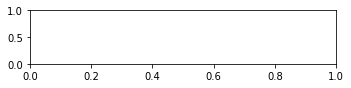

In [26]:
fig = plt.figure(figsize=(5,1.2))
plt.subplots_adjust(left=0.14, right=0.99, top=.99, bottom=0.37)
ax = plt.axes()

for i in range(0, len(T3), 1):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)
    u_kdv = rod.sol_kdv_strain(A30, x - rod.L/2, T3[i])
    ax.plot(x, u0, '--', color='orangered')
    ax.plot(x, u_kdv, ':', color='darkgreen')
    ax.plot(x, u, color='darkblue')
    ax.set_xlabel(r'$\xi$, mm')
    ax.set_ylabel('u', rotation=0)
    ax.set_ylim([-1.4*np.abs(A30), 0.2*np.abs(A30)])
    ax.text(0.1, 0.15, 'time = %.2f' % (T3[i]/1000), transform=ax.transAxes)    
    #ax.legend(['eKdV', 'Full equations'], ncol=2, bbox_to_anchor=(0.2, 0.97))
    fig.savefig(module_path + '/figures/thin_anim/p' + str(i) + '.pdf')
    plt.cla()

## All together

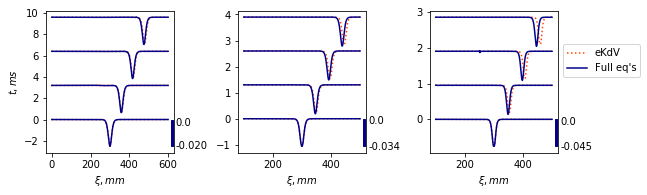

In [739]:
fig, ax = plt.subplots(1, 3, figsize=(9,2.5))
ax[0].set_ylabel('$t, ms$')
x = np.linspace(100, 500, 601)

# 3
sc = 0.75
v = rod.sol_gardner_params(-0.15)[2]
for i in range(0, len(U3), int(len(U3)/3-1)):
    u = U3[i, 0].diff(0)(x + rod.c*T3[i], 0, 0)/np.abs(A30)
    u0 = U3[0, 0].diff(0)(x - v*T3[i], 0, 0)/np.abs(A30)
    ax[2].plot(x, np.ones_like(x)*T3[i]/1000 + u0*sc, ':', color='orangered')
    ax[2].plot(x, np.ones_like(x)*T3[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 11, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
ax[2].legend(['eKdV', 'Full eq\'s'], bbox_to_anchor=(1.0, 0.8))
ax[2].add_patch(rect)
ax[2].set_xlabel(r'$\xi, mm$')
ax[2].text(530, -1.15*sc, str(A30)[:6])
ax[2].text(530, -0.2*sc, '0.0')

# 2
sc = 1.05
v = rod.sol_gardner_params(-0.1)[2]
for i in range(0, len(U2), int(len(U2)/3-1)):
    u = U2[i, 0].diff(0)(x + rod.c*T2[i], 0, 0)/np.abs(A20)
    u0 = U2[0, 0].diff(0)(x - v*T2[i], 0, 0)/np.abs(A20)
    ax[1].plot(x, np.ones_like(x)*T2[i]/1000 + u0*sc, ':', color='orangered')
    ax[1].plot(x, np.ones_like(x)*T2[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 11, -sc), 5, sc, 
                                    color='darkblue',clip_on=False)
ax[1].add_patch(rect)
ax[1].set_xlabel(r'$\xi, mm$')
ax[1].text(530, -1.15*sc, str(A20)[:6])
ax[1].text(530, -0.2*sc, '0.0')

# 1
x = np.linspace(0, rod.L, 301)
sc = 2.5
v = rod.sol_gardner_params(-0.05)[2]
for i in range(0, int(len(T1)), int(len(T1)/3-1)):
    u = U1[i, 0].diff(0)(x + rod.c*T1[i], 0, 0)/np.abs(A10)
    u0 = U1[0, 0].diff(0)(x - v*T1[i], 0, 0)/np.abs(A10)
    ax[0].plot(x, np.ones_like(x)*T1[i]/1000 + u0*sc, ':', color='orangered')
    ax[0].plot(x, np.ones_like(x)*T1[i]/1000 + u*sc, color='darkblue')
rect = matplotlib.patches.Rectangle((x[-1] + 15, -sc), 10, sc, 
                                    color='darkblue',clip_on=False)
ax[0].add_patch(rect)
ax[0].set_xlabel(r'$\xi, mm$')
ax[0].text(640, -1.1*sc, str(A10)[:6])
ax[0].text(640, -0.25*sc, '0.0')

plt.subplots_adjust(left=0.07, right=0.86, top=0.99, bottom=0.2, wspace=0.5)

fig.savefig('figures/' + 'sol2_evol_all.pdf')

# Soliton parameters

In [166]:
rod.c

2.23606797749979

In [180]:
x = np.linspace(0, L, 601)

def soliton(x, X, A, L, B):
    return A/(1 + B*np.cosh((x - X)/L))

def fit(k, thr=0.7, optimize=True):
    u = -U[k, 0](None, 0, 0).diff()(x + c*T[k])
    i = u.argmax()
    X = x[i]
    A = u[i]
    L = np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr))
    B = 1
    if optimize:
        mask = (x > X - 2*L)*(x < X + 2*L)
        X, A, L, B = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, L, B))[0]
    return X, A, L, B
    
Xs, As, Ls, Bs = np.transpose([fit(k) for k in Progress(len(T))])

HTML(value='')

0.0037401605938277567

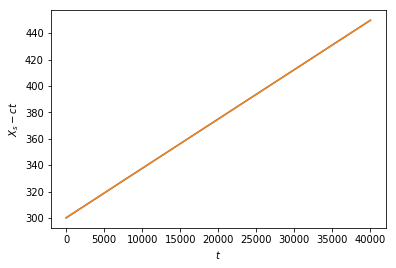

In [181]:
t_max = T[-1]
dv_num, X0 = np.polyfit(T[T > t_max/2], Xs[T > t_max/2], 1)
plt.plot(T, Xs)
plt.plot(T, X0 + dv_num*T)
plt.xlabel('$t$')
plt.ylabel('$X_s - ct$')
dv_num

In [182]:
v = dv_num
A_th = 6*rod.young*dv_num/rod.beta1/rod.c
L_th = rod.R*np.sqrt(-rod.q1*rod.c/2/dv_num)
B_th = np.sqrt(1 - 3*rod.beta4hat*A_th/2/rod.beta1/rod.young)
print(A_th, B_th)

0.010043426125909076 0.89390235500284


0.013517020865023481

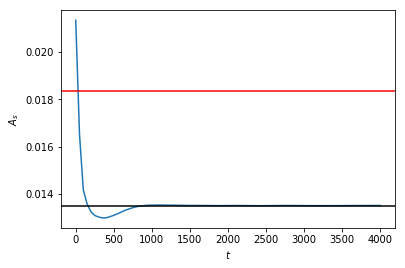

In [25]:
A_num = np.mean(As[T > 0.9*t_max])
plt.plot(T, As)
plt.axhline(A_num, c='k')
plt.axhline(A_th, c='r')
plt.xlabel('$t$')
plt.ylabel('$A_s$')
A_num

3.8331753330795686

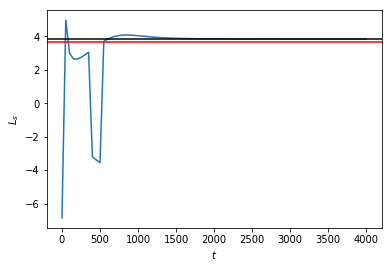

In [26]:
L_num = np.mean(Ls[T > 0.9*t_max])
plt.plot(T, Ls)
plt.axhline(L_num, c='k')
plt.axhline(L_th, c='r')
plt.xlabel('$t$')
plt.ylabel('$L_s$')
L_num

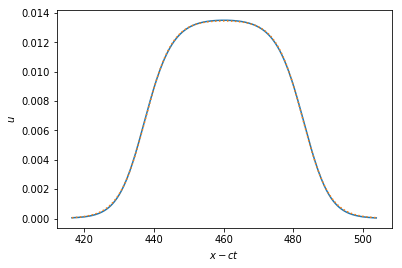

In [33]:
k = -1
x = np.linspace(X0 + dv_num*T[k] - 12*L_th, X0 + dv_num*T[k] + 12*L_th, 1000)
u = -U[k, 0](None, 0, 0).diff()
plt.xlabel(r'$x - ct$')
plt.ylabel(r'$u$')
plt.plot(x, u(x + c*T[k]))
#plt.plot(x, soliton(x, X0 + (v - c)*T[k], A_th, L_th)/A0)

#XAL = sp.optimize.curve_fit(soliton, x, u(x + c*T[k]), (X0 + dv_num*T[k], A_th, L_th))[0]
XALB = sp.optimize.curve_fit(soliton, x, u(x + c*T[k]), (X0 + dv_num*T[k], A_th, L_th, B_th))[0]
#plt.plot(x, soliton(x, *XAL), '--')
plt.plot(x, soliton(x, *XALB), ':')

In [35]:
A0

-0.016921872028861456

In [34]:
XALB

array([4.60105198e+02, 1.35185445e-02, 3.83113378e+00, 5.45341209e-03])

# Group (GE+)

In [6]:
dirs = ['FullEqn_table_top_mat2_A-0.05/', 'FullEqn_table_top_mat2_A-0.1/', 
        'FullEqn_table_top_mat2_A-0.15/', 'FullEqn_table_top_mat2_A-0.2/']
sim_dir = 'simulation_samples/'
ampl_par = [-0.05, -0.1, -0.15, -0.2]

In [7]:
%run -i "simulation_samples/FullEqn_table_top_mat2_A-0.05/data.py"

In [8]:
mesh_grid = np.load(sim_dir + dirs[0] + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][-1]
R = mesh_grid[1][0]
X = mesh_grid[0]
T = np.load(sim_dir + dirs[0] + 'time.npy')
U_func = np.load(sim_dir + dirs[0] + 'displacement.npy')

In [9]:
# time indices for the wave shape analysis
ind = [-1, -1, -1, -1]
x = np.linspace(0, L, 601)

def soliton(x, X, A, F, B):
    return A/(1 + B*np.cosh((x - X)*F))

def fit(k, thr=0.7, optimize=True):
    sgn = np.sign(U[0, 0].diff()((x[-1] - x[0])/2, 0, 0))
    u = U[k, 0](None, 0, 0).diff()(x + rod.c*T[k])*sgn
    i = u.argmax()
    X = x[i]
    A = u[i]
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    B = 1.0
    if optimize:
        mask = (x > X - 2/F)*(x < X + 2/F)
        X, A, F, B = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F, B))[0]
    return X, A, F, B

In [10]:
As = np.zeros(len(dirs))
As0 = np.zeros(len(dirs))
Ls = np.zeros_like(As)
Fs = np.zeros_like(As)
Vs = np.zeros_like(As)
Bs = np.zeros_like(As)
V_th = np.zeros_like(As)
B_th = np.zeros_like(As)
F_th = np.zeros_like(As)

for j in range(0, len(dirs)):
    T = np.load(sim_dir + dirs[j] + 'time.npy')
    U_func = np.load(sim_dir + dirs[j] + 'displacement.npy')
    # kostyl
    mesh_grid = np.load(sim_dir + dirs[j] + 'mesh_grid.npy', allow_pickle=True)
    mesh_x = Multidomain(Legendre(20), np.linspace(0, rod.L, 21), periodic=True)
    if mesh_grid[0].shape[0] == 600:
        mesh_x = Multidomain(Legendre(30), np.linspace(0, rod.L, 21), periodic=True)
    if mesh_grid[0].shape[0] == 900:
        mesh_x = Multidomain(Legendre(30), np.linspace(0, rod.L, 31), periodic=True)
    mesh_r = Legendre(mesh_grid[1].shape[0], (rod.R, 0), 'Radau')
    mesh_phi = Constant()
    mesh = mesh_x*mesh_r*mesh_phi
    # end of kostyl
    U = TensorField(mesh, U_func)
    sgn = np.sign(U[0, 0].diff()((X[-1] - X[0])/2, 0, 0))
    u = U[ind[j], 0].diff()(X + rod.c*T[ind[j]], 0, 0)*sgn
    
    # velocity, length, B
    Xs, As_loc, Fs_loc, Bs_loc = np.transpose([fit(k) for k in Progress(len(T))])
    dV, X0 = np.polyfit(T[T > 3*T[ind[j]]/4], Xs[T > 3*T[ind[j]]/4], 1)
    Vs[j] = dV
    Fs[j] = Fs_loc[ind[j]]
    Bs[j] = Bs_loc[ind[j]]
    B_th[j], F_th[j], V_th[j] = rod.sol_gardner_params(ampl_par[j])
    
    # amplitude
    As[j] = np.max(u)
    As0[j] = U[0, 0].diff()((X[-1] - X[0])/2, 0, 0)*sgn
    
    # length
    peak_ind = np.argmax(u)
    u_thr = u > 0.01*As[j]
    i = peak_ind
    while u_thr[i] == True:
        i = i + 1
    Ls[j] = 2*(X[i] - X[peak_ind])

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

In [11]:
np.save('shape_params2.npy', [As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0])

In [12]:
As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0 = np.load('shape_params2.npy')

In [13]:
gen_arr = [As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0]
gen_arr = np.array([[0.0, *gen_arr[i]] for i in range(len(gen_arr))])
gen_arr

array([[0.00000000e+00, 2.05259125e-02, 3.61537869e-02, 4.89453053e-02, 6.00338468e-02],
       [0.00000000e+00, 6.88518368e+01, 5.09352256e+01, 4.06585372e+01, 3.65408179e+01],
       [0.00000000e+00, 1.82593577e-02, 3.55136096e-02, 5.13650622e-02, 6.65724911e-02],
       [0.00000000e+00, 8.90448485e-01, 7.52032193e-01, 6.64055913e-01, 5.94977921e-01],
       [0.00000000e+00, 1.80733673e-01, 2.55072182e-01, 3.07908852e-01, 3.51576126e-01],
       [0.00000000e+00, 1.86199438e-02, 3.72398875e-02, 5.58598313e-02, 7.44797751e-02],
       [0.00000000e+00, 1.41428646e+00, 1.73216985e+00, 2.00015463e+00, 2.23625239e+00],
       [0.00000000e+00, 1.78927257e-01, 2.53041354e-01, 3.09911101e-01, 3.57854515e-01],
       [0.00000000e+00, 2.01502804e-02, 3.44812347e-02, 4.54300008e-02, 5.39184177e-02]])

In [14]:
As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0 = gen_arr

In [15]:
Bs[0] = 1.0
B_th[0] =1.0

## Velocity - Amplitude curve

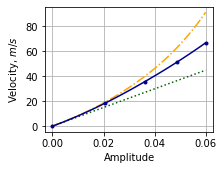

In [25]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(0, As[-1], 101)
spl1 = make_interp_spline(As, Vs, k=3)
spl2 = make_interp_spline(As0, V_th, k=3)
v = rod.sol_gardner_params(-0.04)[2]
kv = v/0.02

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.17, right=0.95, top=0.99, bottom=0.2)
ax.plot(A_arr2, 1000*spl2(A_arr2), '-.', color='orange')
ax.plot([0, As[-1]], [0, As[-1]*kv*1000], ':', color='darkgreen')
ax.plot(A_arr1, 1000*spl1(A_arr1), color='darkblue')
ax.plot(As, 1000*Vs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Velocity, $m/s$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner soliton', 'Full eqn soliton'])
ax.grid()
fig.savefig(module_path + '/figures/' + 'vel_ampl2.pdf')

## N - Amplitude curve

In [17]:
def f(U0):
    nu = rod.nu
    return nu*(1 - 2*nu)*(3 - 2*nu**2)*U0.diff(0).diff(0).diff(0)/8/(1 - nu)

def g(U0):
    return -rod.beta2*U0.diff(0)**2/4/rod.young

def U2(U0):
    return (rod.young - rod.lam - 2*rod.mu 
            + 2*rod.nu*(rod.lam + rod.mu))*U0.diff(0).diff(0)/4/rod.mu

def V3(U0, U2):
    return (-rod.nu*(rod.young - rod.mu)*U0.diff(0).diff(0).diff(0) 
            - 2*(rod.lam + rod.mu)*U2.diff(0))/8/(rod.lam + 2*rod.mu)

def indef_integral(u, x):
    u_int = np.zeros_like(u.func)
    for i in range(1, u_int.shape[0]):
        x0 = x_field.func[i - 1, 0, 0]
        x1 = x_field.func[i, 0, 0]
        x = np.linspace(x0, x1, num=50)
        u_int[i, 0, 0] = u_int[i - 1, 0, 0] + np.trapz(u(x, 0, 0), dx=(x1 - x0)/50)
        for j in range(1, u_int.shape[1]):
            u_int[i, j, 0] = u_int[i, 0, 0]
    return u_int

x = np.linspace(0, rod.L, 301)

def soliton(x, X, A, F, B=1):
    return A/(1 + B*np.cosh((x - X)*F))

def fit(thr=0.7, optimize=True):
    u = -u0[0](None, 0, 0).diff()(x)
    i = u.argmax()
    X = x[i]
    A = u[i]/2
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    B = 1
    if optimize:
        mask = (x > X - 2/F)*(x < X + 2/F)
        X, A, F, B = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F, B))[0]
    return X, A, F, B

In [18]:
Xs_eKdV = np.zeros(len(ampl_par) + 1)
As_eKdV = np.zeros_like(Xs_eKdV)
Fs_eKdV = np.zeros_like(Xs_eKdV)
Bs_eKdV = np.zeros_like(Xs_eKdV)

for i in Progress(range(1, len(ampl_par) + 1)):
    A0 = ampl_par[i-1]
    x_field, r_field, phi_field = TensorField(mesh, np.meshgrid(*mesh.grid(), indexing='ij'))
    xi = x_field - rod.L/2
    v = rod.sol_gardner_params(A0)[2]
    u_data = np.zeros((3,) + mesh.shape)
    u_data[0] += rod.sol_gardner_displ(A0, xi.func, 0)
    u_data_strain = rod.sol_gardner_strain(A0, xi.func, 0)
    u0_strain = TensorField(mesh, u_data_strain)

    u1 = rod.R**2*rod.a1*u0_strain.diff(0).diff(0)
    u2 = rod.a2*(xi*v/rod.c*u0_strain.diff(0))
    u3 = rod.a3*TensorField(mesh, u0_strain.diff(0).func*
                            rod.sol_gardner_displ(A0, xi.func, 0))
    u0 = TensorField(mesh, u_data)
    u0[0] -= TensorField(mesh, indef_integral(u1 + u2 + u3, xi))
    u0_plain = TensorField(mesh, u_data)
    u0[1] -= r_field*rod.nu*u0[0].diff(0)
    u0[0] += r_field**2*U2(u0_plain[0])
    u0[1] += (r_field*(g(u0_plain[0]) + rod.R**2*f(u0_plain[0]))
              + r_field**3*V3(u0_plain[0], U2(u0_plain[0])))
    Xs_eKdV[i], As_eKdV[i], Fs_eKdV[i], Bs_eKdV[i] = fit() 

HTML(value='')

In [19]:
Bs_eKdV[0] = 1.0

In [20]:
Xs_KdV = np.zeros(len(ampl_par) + 1)
As_KdV = np.zeros_like(Xs_KdV)
Fs_KdV = np.zeros_like(Xs_KdV)
Bs_KdV = np.zeros_like(Xs_KdV)

for j in Progress(range(1, len(ampl_par) + 1)):
    A0 = ampl_par[j-1]
    u = -rod.sol_kdv_strain(A0, x - rod.L/2, 0)
    i = u.argmax()
    X = x[i]
    A = -A0
    thr=0.7
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    mask = (x > X - 2/F)*(x < X + 2/F)
    Xs_KdV[j], As_KdV[j], Fs_KdV[j] = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F))[0]

HTML(value='')

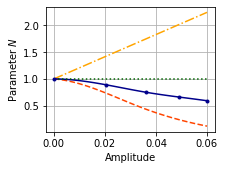

In [24]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(As[0], As[-1], 101)
spl1 = make_interp_spline(As, Bs, k=3)
spl2 = make_interp_spline(As0, B_th, k=3)
spl3 = make_interp_spline(As0, Bs_eKdV, k=3)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.18, right=0.96, top=0.99, bottom=0.2)
#ax.plot(A_arr2, spl2(A_arr2), color='orange')
ax.plot([A_arr2[0], A_arr2[-1]], [1.0, B_th[-1]], '-.', color='orange')
ax.plot(A_arr2, spl3(A_arr2), '--', color='orangered')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
ax.plot([As[0], As[-1]], [1, 1], ':', color='darkgreen')
ax.plot(As, Bs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Parameter $N$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner', 'eKdV asympt.', 'Full eq\'n'])
ax.grid()
fig.savefig(module_path + '/figures/' + 'N_ampl2.pdf')

## F - Amplitude curve

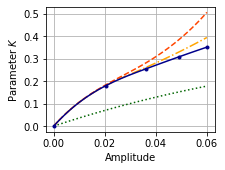

In [27]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(As[0], As[-1], 101)
spl1 = make_interp_spline(As, Fs, k=3)
spl2 = make_interp_spline(As0, F_th, k=3)
spl3 = make_interp_spline(As0, Fs_eKdV, k=3)
spl4 = make_interp_spline(As_KdV, Fs_KdV, k=3)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.18, right=0.96, top=0.99, bottom=0.2)
ax.plot(A_arr2, spl2(A_arr2), '-.', color='orange')
ax.plot(A_arr2, spl3(A_arr2), '--', color='orangered')
ax.plot(A_arr1, spl4(A_arr1), ':', color='darkgreen')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
#ax.plot([As[0], As[-1]], [1, 1], color='darkgreen')
ax.plot(As, Fs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Parameter $K$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner', 'eKdV asympt.', 'Full eq\'n'])
ax.grid()
fig.savefig(module_path + '/figures/' + 'F_ampl2.pdf')

# Group (GE-)

In [74]:
dirs = ['FullEqn_table_top_mat1_A-0.01/', 'FullEqn_table_top_mat1_A-0.03/',
        'FullEqn_table_top_mat1_A-0.04/', 'FullEqn_table_top_mat1_A-0.045/',
        'FullEqn_table_top_mat1_A-0.0499/', 'FullEqn_table_top_mat1_A-0.0499825675/']
sim_dir = 'simulation_samples/'
ampl_par = [-0.01, -0.03, -0.04, -0.045, -0.0499, -0.0499825675]

In [75]:
%run -i "simulation_samples/FullEqn_table_top_mat1_A-0.01/data.py"

<Figure size 432x288 with 0 Axes>

In [76]:
mesh_grid = np.load(sim_dir + dirs[0] + 'mesh_grid.npy', allow_pickle=True)
L = mesh_grid[0][0]
R = mesh_grid[1][0]
X = mesh_grid[0]
T = np.load(sim_dir + dirs[0] + 'time.npy')
U_func = np.load(sim_dir + dirs[0] + 'displacement.npy')

In [77]:
# time indices for the wave shape analysis
ind = [-1, -1, -1, -1, -1, -100]

def soliton(x, X, A, F, B):
    return A/(1 + B*np.cosh((x - X)*F))

def fit(k, thr=0.7, optimize=True):
    sgn = np.sign(U[0, 0].diff()((x[-1] - x[0])/2, 0, 0))
    u = U[k, 0](None, 0, 0).diff()(x + rod.c*T[k])*sgn
    i = u.argmax()
    X = x[i]
    A = u[i]
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    B = 1.0
    if optimize:
        mask = (x > X - 2/F)*(x < X + 2/F)
        X, A, F, B = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F, B))[0]
    return X, A, F, B

def length(u, A, x, peak_ind=-1.0):
    if peak_ind < 0:
        peak_ind = np.argmax(u)
    u_thr = u > 0.5*A
    i = peak_ind
    while u_thr[i] == True:
        i = i + 1
    return 2*(x[i] - x[peak_ind])

In [78]:
As = np.zeros(len(dirs))
As0 = np.zeros(len(dirs))
Ls = np.zeros_like(As)
Vs = np.zeros_like(As)
Vs_g = np.zeros_like(As)
Vs_g0 = np.zeros_like(As)
Fs = np.zeros_like(As)
Bs = np.zeros_like(As)
B_th = np.zeros_like(As)
F_th = np.zeros_like(As)
V_th = np.zeros_like(As)
#Ls_g = np.zeros_like(As)
#Ls_ekdv = np.zeros_like(As)

for j in range(0, len(dirs)):
    T = np.load(sim_dir + dirs[j] + 'time.npy')
    U_func = np.load(sim_dir + dirs[j] + 'displacement.npy')
    # kostyl
    mesh_grid = np.load(sim_dir + dirs[j] + 'mesh_grid.npy', allow_pickle=True)
    L = mesh_grid[0][-1]
    x = np.linspace(0, L, int(L*10+1))
    mesh_x = Multidomain(Legendre(20), np.linspace(0, L, 21), periodic=True)
    if mesh_grid[0].shape[0] == 600:
        mesh_x = Multidomain(Legendre(30), np.linspace(0, L, 21), periodic=True)
    if mesh_grid[0].shape[0] == 650:
        mesh_x = Multidomain(Legendre(26), np.linspace(0, L, 26), periodic=True)
    mesh_r = Legendre(mesh_grid[1].shape[0], (R, 0), 'Radau')
    mesh_phi = Constant()
    mesh = mesh_x*mesh_r*mesh_phi
    # end of kostyl
    U = TensorField(mesh, U_func)
    sgn = np.sign(U[0, 0].diff()((x[-1] - x[0])/2, 0, 0))
    u = U[ind[j], 0].diff()(x + rod.c*T[ind[j]], 0, 0)*sgn
    
    # velocity, F, B
    Xs, As_loc, Fs_loc, Bs_loc = np.transpose([fit(k) for k in Progress(len(T))])
    T_sl = T[T > 3*T[ind[j]]/4]
    Xs_sl = Xs[T > 3*T[ind[j]]/4]
    dV, X0 = np.polyfit(T_sl[T_sl < T[ind[j]]], Xs_sl[T_sl < T[ind[j]]], 1)
    Vs[j] = dV
    Fs[j] = Fs_loc[ind[j]]
    Bs[j] = Bs_loc[ind[j]]
    B_th[j], F_th[j], V_th[j] = rod.sol_gardner_params(ampl_par[j])
    Vs_g[j] = rod.sol_gardner_params(ampl_par[j])[2]
    u_g = -rod.sol_gardner_strain(ampl_par[j], x - L/2, 0)
    U_g = TensorField(mesh_x, rod.sol_gardner_strain(ampl_par[j], 
                                                     mesh_x.grid()[0] - L/2, 0))
    u_ekdv = -rod.sol_ekdv_strain(U_g, ampl_par[j], x, 0)
    
    # amplitude
    As[j] = np.max(u)
    As0[j] = U[0, 0].diff()((x[-1] - x[0])/2, 0, 0)*sgn
    
    # length
    Ls[j] = length(u, As[j], x)
    #Ls_g[j] = length(u_g, As0[j], x)
    #Ls_ekdv[j] = length(u_ekdv, As0[j], x)
    #peak_ind = np.argmax(u)
    #u_thr = u > 0.5*As[j]
    #i = peak_ind
    #while u_thr[i] == True:
    #    i = i + 1
    #Ls[j] = 2*(x[i] - x[peak_ind])

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

In [54]:
A_arr2 = np.linspace(0, As0[-1], 101)
Ampl_par = np.linspace(0, 0.0499825675, 101)
A_arr3 = np.zeros_like(Ampl_par)
Ls_g = np.zeros_like(A_arr2)
Ls_kdv = np.zeros_like(A_arr2)
Ls_ekdv = np.zeros_like(A_arr2)
x = np.linspace(0, rod.L, 12000 + 1)

for j in Progress(range(1, len(A_arr3))):
    u_kdv = -rod.sol_kdv_strain(-A_arr2[j], x - rod.L/2, 0)
    u_g = -rod.sol_gardner_strain(-A_arr2[j], x - rod.L/2, 0)
    U_g = TensorField(mesh_x, rod.sol_gardner_strain(-A_arr2[j], 
                                                     mesh_x.grid()[0] - rod.L/2, 0))
    u_ekdv = -rod.sol_ekdv_strain(U_g, -A_arr2[j], x, 0)
    i = u_g.argmax()
    A_arr3[j] = u_g[i]
    Ls_g[j] = length(u_g, A_arr3[j], x)
    Ls_kdv[j] = length(u_kdv, A_arr3[j], x)
    Ls_ekdv[j] = length(u_ekdv, A_arr3[j], x, peak_ind=len(x)//2)

HTML(value='')

In [79]:
np.save('shape_params.npy', [As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0])

In [80]:
As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0 = np.load('shape_params.npy', allow_pickle=True)

In [83]:
#gen_arr = [As, Ls, Vs, Bs, Fs, V_th, B_th, F_th, As0]
gen_arr = [As, Ls, Vs, Vs_g, As0]
gen_arr = np.array([[0.0, *gen_arr[i]] for i in range(len(gen_arr))])
As, Ls, Vs, Vs_g, As0 = gen_arr
gen_arr

array([[0.00000000e+00, 5.29297311e-03, 1.88044747e-02, 2.88316372e-02, 3.64059734e-02, 5.49405270e-02,
        5.91050926e-02],
       [0.00000000e+00, 4.56000000e+01, 2.86000000e+01, 2.68000000e+01, 2.74000000e+01, 4.10000000e+01,
        1.28600000e+02],
       [0.00000000e+00, 3.74037566e-03, 1.15080474e-02, 1.57082121e-02, 1.80348725e-02, 2.08600578e-02,
        2.07709544e-02],
       [0.00000000e+00, 3.72398875e-03, 1.11719663e-02, 1.48959550e-02, 1.67579494e-02, 1.85827039e-02,
        1.86134519e-02],
       [0.00000000e+00, 5.25575059e-03, 1.81839818e-02, 2.73300963e-02, 3.38607024e-02, 4.78648423e-02,
        4.99818913e-02]])

In [85]:
Bs[0] = 1.0
B_th[0] =1.0

## Velocity - Amplitude curve

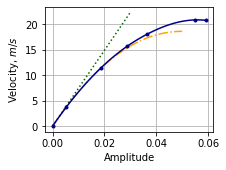

In [84]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(As0[0], As0[-1], 101)
spl1 = make_interp_spline(As, Vs, k=3)
spl2 = make_interp_spline(As0, Vs_g, k=3)
v = rod.sol_gardner_params(-0.04)[2]
kv = v/0.02

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.17, right=0.95, top=0.99, bottom=0.2)
ax.plot(A_arr2, 1000*spl2(A_arr2), '-.', color='orange')
ax.plot([0, 0.03], [0, 0.03*kv*1000], ':', color='darkgreen')
ax.plot(A_arr1, 1000*spl1(A_arr1), color='darkblue')
ax.plot(As, 1000*Vs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Velocity, $m/s$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner soliton', 'Full eqn soliton'])
ax.grid()
#fig.savefig(module_path + '/figures/' + 'vel_ampl.pdf')

## FWHM - Amplitude

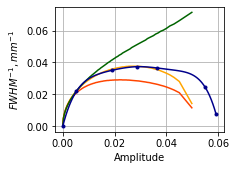

In [90]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(As0[0], As0[-1], 101)
spl1 = make_interp_spline(As, [0, *(1/Ls[1:])], k=5)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.17, right=0.95, top=0.99, bottom=0.2)
ax.plot(A_arr3, [0, *(1/Ls_g[1:])], color='orange')
ax.plot(A_arr3, [0, *(1/Ls_ekdv[1:])], color='orangered')
ax.plot(A_arr3, [0, *(1/Ls_kdv[1:])], color='darkgreen')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
ax.plot(As, [0, *(1/Ls[1:])], color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'$FWHM^{-1}, mm^{-1}$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner soliton', 'Full eqn soliton'])
ax.grid()
fig.savefig(module_path + '/figures/' + 'wid_ampl.pdf')

In [35]:
A_arr3.shape

(101,)

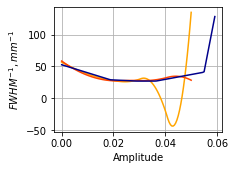

In [85]:
# smooth curves
spl1 = make_interp_spline(As[1:], Ls[1:], k=1)
spl2 = make_interp_spline(As0[1:], Ls_g[1:], k=2)
spl3 = make_interp_spline(As0[1:], Ls_ekdv[1:], k=2)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.17, right=0.95, top=0.99, bottom=0.2)
ax.plot(A_arr2, spl2(A_arr2), color='orange')
ax.plot(A_arr2, spl3(A_arr2), color='orangered')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
#ax.plot(As, Ls, color='darkblue', marker='.', linewidth=0)
#ax.plot([0, 0.03], [0, 0.03*kv*1000], color='darkgreen')
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'$FWHM^{-1}, mm^{-1}$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner soliton', 'Full eqn soliton'])
ax.grid()
#fig.savefig(module_path + '/figures/' + 'vel_ampl.pdf')

## N - Amplitude curve

In [61]:
def f(U0):
    nu = rod.nu
    return nu*(1 - 2*nu)*(3 - 2*nu**2)*U0.diff(0).diff(0).diff(0)/8/(1 - nu)

def g(U0):
    return -rod.beta2*U0.diff(0)**2/4/rod.young

def U2(U0):
    return (rod.young - rod.lam - 2*rod.mu 
            + 2*rod.nu*(rod.lam + rod.mu))*U0.diff(0).diff(0)/4/rod.mu

def V3(U0, U2):
    return (-rod.nu*(rod.young - rod.mu)*U0.diff(0).diff(0).diff(0) 
            - 2*(rod.lam + rod.mu)*U2.diff(0))/8/(rod.lam + 2*rod.mu)

def indef_integral(u, x):
    u_int = np.zeros_like(u.func)
    for i in range(1, u_int.shape[0]):
        x0 = x_field.func[i - 1, 0, 0]
        x1 = x_field.func[i, 0, 0]
        x = np.linspace(x0, x1, num=50)
        u_int[i, 0, 0] = u_int[i - 1, 0, 0] + np.trapz(u(x, 0, 0), dx=(x1 - x0)/50)
        for j in range(1, u_int.shape[1]):
            u_int[i, j, 0] = u_int[i, 0, 0]
    return u_int

x = np.linspace(0, rod.L, 601)

def soliton(x, X, A, F, B=1):
    return A/(1 + B*np.cosh((x - X)*F))

def fit(thr=0.7, optimize=True):
    u = -u0[0](None, 0, 0).diff()(x)
    i = u.argmax()
    X = x[i]
    A = u[i]
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    B = 1
    if optimize:
        mask = (x > X - 2/F)*(x < X + 2/F)
        X, A, F, B = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F, B))[0]
    return X, A, F, B

In [62]:
Xs_eKdV = np.zeros(len(ampl_par) + 1)
As_eKdV = np.zeros_like(Xs_eKdV)
Fs_eKdV = np.zeros_like(Xs_eKdV)
Bs_eKdV = np.zeros_like(Xs_eKdV)

for i in Progress(range(1, len(ampl_par) + 1)):
    A0 = ampl_par[i-1]
    x_field, r_field, phi_field = TensorField(mesh, np.meshgrid(*mesh.grid(), indexing='ij'))
    xi = x_field - rod.L/2
    v = rod.sol_gardner_params(A0)[2]
    u_data = np.zeros((3,) + mesh.shape)
    u_data[0] += rod.sol_gardner_displ(A0, xi.func, 0)
    u_data_strain = rod.sol_gardner_strain(A0, xi.func, 0)
    u0_strain = TensorField(mesh, u_data_strain)

    u1 = rod.R**2*rod.a1*u0_strain.diff(0).diff(0)
    u2 = rod.a2*(xi*v/rod.c*u0_strain.diff(0))
    u3 = rod.a3*TensorField(mesh, u0_strain.diff(0).func*
                            rod.sol_gardner_displ(A0, xi.func, 0))
    u0 = TensorField(mesh, u_data)
    u0[0] -= TensorField(mesh, indef_integral(u1 + u2 + u3, xi))
    u0_plain = TensorField(mesh, u_data)
    u0[1] -= r_field*rod.nu*u0[0].diff(0)
    Xs_eKdV[i], As_eKdV[i], Fs_eKdV[i], Bs_eKdV[i] = fit() 

HTML(value='')

In [63]:
Bs_eKdV[0] = 1.0

In [64]:
Xs_KdV = np.zeros(len(ampl_par) + 1)
As_KdV = np.zeros_like(Xs_KdV)
Fs_KdV = np.zeros_like(Xs_KdV)
Bs_KdV = np.zeros_like(Xs_KdV)

for j in Progress(range(1, len(ampl_par) + 1)):
    A0 = ampl_par[j-1]
    u = -rod.sol_kdv_strain(A0, x - rod.L/2, 0)
    i = u.argmax()
    X = x[i]
    A = -A0
    thr=0.7
    F = 1/(np.trapz((u > thr*A).astype(float), x)/2/np.arccosh(1/np.sqrt(thr)))
    mask = (x > X - 2/F)*(x < X + 2/F)
    Xs_KdV[j], As_KdV[j], Fs_KdV[j] = sp.optimize.curve_fit(soliton, x[mask], u[mask], (X, A, F))[0]

HTML(value='')

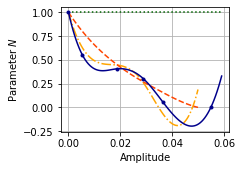

In [91]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(0, 0.049981, 101)
spl1 = make_interp_spline(As[:-1], Bs, k=3)
spl2 = make_interp_spline(As0[:-1], B_th, k=3)
spl3 = make_interp_spline(As0, Bs_eKdV, k=3)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.18, right=0.96, top=0.99, bottom=0.2)
ax.plot(A_arr2, spl2(A_arr2), '-.', color='orange')
ax.plot(A_arr2, spl3(A_arr2), '--', color='orangered')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
ax.plot(A_arr1, np.ones_like(A_arr1), ':', color='darkgreen')
ax.plot(As[:-1], Bs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Parameter $N$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner', 'eKdV', 'Full eqns.', 'KdV'])
ax.grid()
#fig.savefig(module_path + '/figures/' + 'N_ampl.pdf')

In [87]:
As0

array([0.        , 0.00525575, 0.01818398, 0.0273301 , 0.0338607 , 0.04786484, 0.04998189])

In [88]:
B_th

array([1.00000000e+00, 6.32290074e-01, 4.46901536e-01, 3.15731065e-01, 4.06438939e-02, 1.29381343e-05])

## F - Amplitude curve

In [191]:
Fs_eKdV

array([ 0.        ,  0.07989144,  0.13851196,  0.16020817,  0.18527936, -0.20205638])

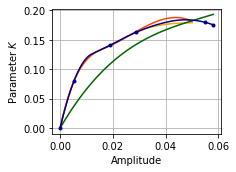

In [230]:
# smooth curves
A_arr1 = np.linspace(As[0], As[-1], 101)
A_arr2 = np.linspace(0, 0.049981, 101)
spl1 = make_interp_spline(As, Fs, k=2)
spl2 = make_interp_spline(As0, F_th, k=3)
spl3 = make_interp_spline(As0[:-1], np.abs(Fs_eKdV[:-1]), k=3)
spl4 = make_interp_spline(As_KdV, Fs_KdV, k=3)

# graph
fig = plt.figure(figsize=(3,2.2))
ax = plt.axes()
plt.subplots_adjust(left=0.18, right=0.96, top=0.99, bottom=0.2)
ax.plot(A_arr2, spl2(A_arr2), color='orange')
ax.plot(A_arr2, spl3(A_arr2), color='orangered')
ax.plot(A_arr1, spl4(A_arr1), color='darkgreen')
ax.plot(A_arr1, spl1(A_arr1), color='darkblue')
#ax.plot([As[0], As[-1]], [1, 1], color='darkgreen')
ax.plot(As, Fs, color='darkblue', marker='.', linewidth=0)
ax.set_xlabel(r'Аmplitude')
ax.set_ylabel(r'Parameter $K$')
#ax.set_xlim(As[0], As[-1])
#ax.legend(['Gardner', 'eKdV asympt.', 'Full eq\'n'])
ax.grid()
fig.savefig(module_path + '/figures/' + 'F_ampl.pdf')

In [109]:
def drop(l, n):
    return np.array([*l[:n], *l[n+1:]])

In [114]:
Fs2 = drop(Fs, 2)
F_th2 = drop(F_th, 2)
Fs_eKdV2 = drop(Fs_eKdV, 2)
As2 = drop(As, 2)
As02 = drop(As0, 2)